In [4]:
import pandas as pd
import numpy as np

In [5]:
pip install -U mlflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install --upgrade pip

  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\MANASA\anaconda3\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
df=pd.read_csv("C:\\Users\\MANASA\\Downloads\\Bank_customers_data.csv")

In [8]:
df.columns

Index(['Unnamed: 0', 'Customer ID', 'Name', 'Surname', 'Gender', 'Age',
       'Region', 'Job Classification', 'Date Joined', 'Balance', 'loan',
       'score', 'loan_eligibility'],
      dtype='object')

In [9]:
df.dtypes

Unnamed: 0              int64
Customer ID             int64
Name                   object
Surname                object
Gender                 object
Age                     int64
Region                 object
Job Classification     object
Date Joined            object
Balance               float64
loan                  float64
score                 float64
loan_eligibility      float64
dtype: object

# Checking null values

In [10]:
df.isnull().sum()

Unnamed: 0            0
Customer ID           0
Name                  0
Surname               0
Gender                0
Age                   0
Region                0
Job Classification    0
Date Joined           0
Balance               0
loan                  0
score                 0
loan_eligibility      0
dtype: int64

# Seperating data into numerical and categorical columns

In [11]:
df_num=df.select_dtypes(include=[np.number])

In [12]:
df_cat=df.select_dtypes(include=["object"])

In [13]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

# outlier processing of numerical data

In [14]:
df_num.describe()

,Unnamed: 0,Customer ID,Age,Balance,loan,score,loan_eligibility
count,4014.000000,4.014000e+03,4014.000000,4014.000000,4014.000000,4014.000000,4.014000e+03
mean,2006.500000,1.696831e+08,38.611111,39766.448274,5557.883159,501.068012,2.100837e+05
std,1158.886319,8.865374e+07,9.819121,29859.489192,2582.640099,113.666117,3.677718e+05
min,0.000000,1.000000e+08,15.000000,11.520000,1000.000000,300.000000,0.000000e+00
25%,1003.250000,1.000020e+08,31.000000,16115.367500,3366.000000,404.000000,0.000000e+00
50%,2006.500000,1.000038e+08,37.000000,33567.330000,5566.500000,502.000000,3.040905e+04
75%,3009.750000,2.000031e+08,45.000000,57533.930000,7768.750000,596.750000,2.787510e+05
max,4013.000000,4.000038e+08,64.000000,183467.700000,9996.000000,700.000000,3.633620e+06


<Axes: >

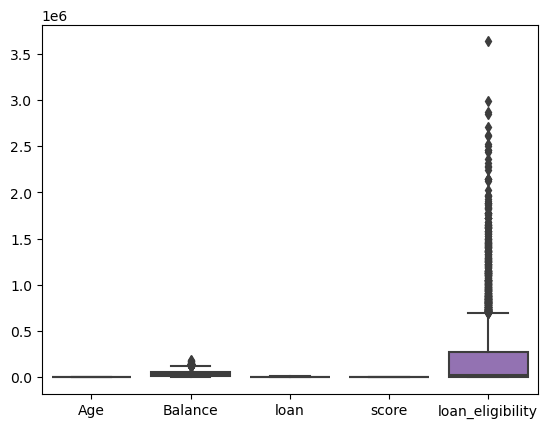

In [15]:
sns.boxplot(df_num[['Age','Balance','loan','score','loan_eligibility']])

In [16]:
df_num=df_num[['Age','Balance','loan','score','loan_eligibility']]

In [17]:
df_num.describe()

,Age,Balance,loan,score,loan_eligibility
count,4014.000000,4014.000000,4014.000000,4014.000000,4.014000e+03
mean,38.611111,39766.448274,5557.883159,501.068012,2.100837e+05
std,9.819121,29859.489192,2582.640099,113.666117,3.677718e+05
min,15.000000,11.520000,1000.000000,300.000000,0.000000e+00
25%,31.000000,16115.367500,3366.000000,404.000000,0.000000e+00
50%,37.000000,33567.330000,5566.500000,502.000000,3.040905e+04
75%,45.000000,57533.930000,7768.750000,596.750000,2.787510e+05
max,64.000000,183467.700000,9996.000000,700.000000,3.633620e+06


In [18]:
q1=0
q3=2.787510e+05
llimt=0
ulimit=2.787510e+05*1.15

In [19]:
df_num_1=df_num[(df_num["loan_eligibility"]>llimt) & (df_num["loan_eligibility"]<ulimit)]


<Axes: >

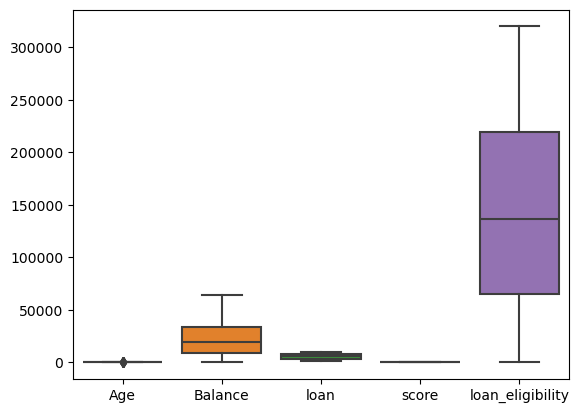

In [20]:
sns.boxplot(df_num_1)

# Scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
mms=MinMaxScaler()

In [23]:
mms.fit(df_num_1)

MinMaxScaler()

In [24]:
df_num_s=mms.transform(df_num_1)

# encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()

In [27]:
df_cat1=df_cat.loc[df_num_1.index.values]

In [28]:
df_cat_=df_cat1.apply(le.fit_transform)

In [29]:
df_cat_

,Name,Surname,Gender,Region,Job Classification,Date Joined
4,41,109,0,0,0,72
6,46,133,0,0,0,92
9,44,100,1,0,2,103
10,44,72,1,0,2,103
15,119,94,1,0,2,122
...,...,...,...,...,...,...
3988,155,10,1,0,2,257
3991,12,27,1,0,2,257
3992,82,132,1,0,2,257
4004,83,47,1,0,2,266


In [30]:
pd.DataFrame(df_num_s)

,0,1,2,3,4
0,0.487805,0.556861,0.176379,0.263819,0.556861
1,0.390244,0.670021,0.182829,0.419598,0.670021
2,0.585366,0.170379,0.369996,0.816583,0.682055
3,0.536585,0.619818,0.601423,0.404523,0.619818
4,0.585366,0.032906,0.471641,0.500000,0.032906
...,...,...,...,...,...
1266,0.195122,0.577562,0.477313,0.419598,0.577562
1267,0.000000,0.365549,0.440836,0.419598,0.365549
1268,0.268293,0.471182,0.186165,0.180905,0.471182
1269,0.658537,0.131671,0.877113,0.703518,0.263522


In [31]:
df_cat_.reset_index(inplace = True)

In [32]:
df_final=pd.concat([pd.DataFrame(df_num_s),df_cat_],axis=1)

In [33]:
df_final

,0,1,2,3,4,index,Name,Surname,Gender,Region,Job Classification,Date Joined
0,0.487805,0.556861,0.176379,0.263819,0.556861,4,41,109,0,0,0,72
1,0.390244,0.670021,0.182829,0.419598,0.670021,6,46,133,0,0,0,92
2,0.585366,0.170379,0.369996,0.816583,0.682055,9,44,100,1,0,2,103
3,0.536585,0.619818,0.601423,0.404523,0.619818,10,44,72,1,0,2,103
4,0.585366,0.032906,0.471641,0.500000,0.032906,15,119,94,1,0,2,122
...,...,...,...,...,...,...,...,...,...,...,...,...
1266,0.195122,0.577562,0.477313,0.419598,0.577562,3988,155,10,1,0,2,257
1267,0.000000,0.365549,0.440836,0.419598,0.365549,3991,12,27,1,0,2,257
1268,0.268293,0.471182,0.186165,0.180905,0.471182,3992,82,132,1,0,2,257
1269,0.658537,0.131671,0.877113,0.703518,0.263522,4004,83,47,1,0,2,266


In [34]:
df_final.drop(['index','Name','Surname'],axis=1,inplace=True)

In [35]:
df_final.drop(['Date Joined'],axis=1,inplace=True)

In [36]:
df_final.head()

,0,1,2,3,4,Gender,Region,Job Classification
0,0.487805,0.556861,0.176379,0.263819,0.556861,0,0,0
1,0.390244,0.670021,0.182829,0.419598,0.670021,0,0,0
2,0.585366,0.170379,0.369996,0.816583,0.682055,1,0,2
3,0.536585,0.619818,0.601423,0.404523,0.619818,1,0,2
4,0.585366,0.032906,0.471641,0.500000,0.032906,1,0,2


In [37]:
df_final.rename(columns={0:'Age',1:'Balance',2:'loan',3:'score',4:'loan_eligibility'},inplace=True)

In [38]:
df_final.head()

,Age,Balance,loan,score,loan_eligibility,Gender,Region,Job Classification
0,0.487805,0.556861,0.176379,0.263819,0.556861,0,0,0
1,0.390244,0.670021,0.182829,0.419598,0.670021,0,0,0
2,0.585366,0.170379,0.369996,0.816583,0.682055,1,0,2
3,0.536585,0.619818,0.601423,0.404523,0.619818,1,0,2
4,0.585366,0.032906,0.471641,0.500000,0.032906,1,0,2


In [39]:
X=df_final.drop(['loan_eligibility'],axis=1)
y=df_final['loan_eligibility']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=50)

In [41]:
X_train

,Age,Balance,loan,score,Gender,Region,Job Classification
175,0.317073,0.100773,0.155138,0.761307,1,0,0
663,0.536585,0.244176,0.267571,0.718593,1,0,1
1232,0.439024,0.075891,0.962189,0.502513,0,0,2
1184,0.219512,0.670364,0.568617,0.190955,0,0,2
990,0.341463,0.426763,0.978425,0.489950,1,0,0
...,...,...,...,...,...,...,...
1268,0.268293,0.471182,0.186165,0.180905,1,0,2
229,0.487805,0.372571,0.290147,0.110553,0,0,2
70,0.341463,0.051254,0.285698,0.394472,0,0,1
132,0.195122,0.230490,0.183052,0.208543,0,0,2


In [42]:
y_train

175     0.403631
663     0.488532
1232    0.151962
1184    0.670364
990     0.426763
          ...   
1268    0.471182
229     0.372571
70      0.051254
132     0.230490
109     0.233434
Name: loan_eligibility, Length: 889, dtype: float64

In [43]:
import os
os.environ['GIT_PYTHON_REFRESH']='quiet'
os.environ['MLFLOW_TRACKING_URI']='file:///C://Users//MLOPS'

In [44]:
import mlflow


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Evaluate the model
predictions = rf.predict(X_test)
accuracy = r2_score(y_test, predictions)
print("Accuracy:",accuracy)

Accuracy: 0.9954352172651233


In [55]:
import os
import yaml

# Function to validate tag names
def is_valid_tag_name(tag_name):
    return all(
        c.isalnum() or c in '_-. /' for c in tag_name
    )

# Function to clean up invalid tags from experiment directories
def clean_invalid_tags(experiment_root):
    for root, dirs, files in os.walk(experiment_root):
        for file in files:
            if file == "meta.yaml":
                meta_path = os.path.join(root, file)
                with open(meta_path, 'r') as f:
                    meta_data = yaml.safe_load(f)

                # Check and clean invalid tags
                if 'tags' in meta_data:
                    if isinstance(meta_data['tags'], dict):
                        cleaned_tags = {
                            k: v for k, v in meta_data['tags'].items()
                            if is_valid_tag_name(k)
                        }
                        meta_data['tags'] = cleaned_tags
                    elif isinstance(meta_data['tags'], list):
                        cleaned_tags = [
                            tag for tag in meta_data['tags']
                            if isinstance(tag, dict) and all(is_valid_tag_name(k) for k in tag.keys())
                        ]
                        meta_data['tags'] = cleaned_tags
                    else:
                        # Handle unexpected types in tags
                        meta_data['tags'] = {}

                    with open(meta_path, 'w') as f:
                        yaml.safe_dump(meta_data, f, default_flow_style=False)

# Path to the experiment root directory
experiment_root = "C:/Users/MLOPS"
clean_invalid_tags(experiment_root)




In [59]:
import os
import yaml
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, filename="cleanup.log", filemode="w",
                    format="%(name)s - %(levelname)s - %(message)s")

# Function to validate tag names
def is_valid_tag_name(tag_name):
    valid = all(c.isalnum() or c in '_-. /' for c in tag_name)
    if not valid:
        logging.warning(f"Invalid tag name detected: {tag_name}")
    return valid

# Function to clean up invalid tags from experiment directories
def clean_invalid_tags(experiment_root):
    # Ensure the .trash directory exists
    trash_dir = os.path.join(experiment_root, '.trash')
    if not os.path.exists(trash_dir):
        os.makedirs(trash_dir)

    for root, dirs, files in os.walk(experiment_root):
        for file in files:
            if file == "meta.yaml":
                meta_path = os.path.join(root, file)
                with open(meta_path, 'r') as f:
                    try:
                        meta_data = yaml.safe_load(f)
                    except yaml.YAMLError as exc:
                        logging.error(f"Error reading {meta_path}: {exc}")
                        continue

                if 'tags' in meta_data:
                    if isinstance(meta_data['tags'], dict):
                        cleaned_tags = {
                            k: v for k, v in meta_data['tags'].items() if is_valid_tag_name(k)
                        }
                        meta_data['tags'] = cleaned_tags
                    elif isinstance(meta_data['tags'], list):
                        cleaned_tags = [
                            tag for tag in meta_data['tags']
                            if isinstance(tag, dict) and all(is_valid_tag_name(k) for k in tag.keys())
                        ]
                        meta_data['tags'] = cleaned_tags
                    else:
                        # Handle unexpected types in tags
                        logging.error(f"Unexpected tags type in {meta_path}: {type(meta_data['tags'])}")
                        meta_data['tags'] = {}

                    with open(meta_path, 'w') as f:
                        try:
                            yaml.safe_dump(meta_data, f, default_flow_style=False)
                        except yaml.YAMLError as exc:
                            logging.error(f"Error writing {meta_path}: {exc}")

# Path to the experiment root directory
experiment_root = "C:/Users/MLOPS"
clean_invalid_tags(experiment_root)


In [60]:
import mlflow
import mlflow.sklearn

# Log the model with MLflow
mlflow.set_tracking_uri(uri="file:///C:/Users/MLOPS")
#EXPERIMENT_ID = mlflow.create_experiment("ex8",tags={"version":'v1','m1':'rf'})
exp=mlflow.set_experiment(experiment_name="ex8")
with mlflow.start_run():
    mlflow.sklearn.log_model(rf, "random-forest-model")
    mlflow.log_metric("accuracy", accuracy)



C:\Users\MANASA\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [63]:
import requests
import json

#data = {"columns": iris.feature_names, "data": [[6.1, 2.8, 4.7, 1.2]]}
data = {'dataframe_records': X_test.values.tolist()}
headers = {"Content-Type": "application/json"}

response = requests.post("http://localhost:8002/invocations", data=json.dumps(data), headers=headers)
predictions = response.json()

print(predictions)

{'predictions': [0.43367995413608346, 0.19616989092627782, 0.10131444103820249, 0.7186864326644116, 0.7215207536411826, 0.07020123762554195, 0.3643628519778969, 0.22523913975146814, 0.290240780874447, 0.060600260266474616, 0.17339755438290802, 0.3484563175263496, 0.1183549617712125, 0.0823198383009343, 0.7502799849579352, 0.911996143204704, 0.3115363255537851, 0.6773653880599396, 0.660301005398826, 0.9253994946591615, 0.03094060260160194, 0.26188649743406506, 0.5678982966393861, 0.6523195679063858, 0.34064139462318066, 0.3460701294048908, 0.5702710916343673, 0.2539051505941334, 0.9305507108563247, 0.18314217689180043, 0.9438262063269812, 0.028525935526061207, 0.11931982642233015, 0.5329628802989909, 0.9322026793130037, 0.8644435702208386, 0.7888761855550541, 0.3927156052664734, 0.14248751418008407, 0.40500271957522144, 0.12207985610633725, 0.4947453477289522, 0.49035472013539105, 0.560764066221344, 0.26968523886466805, 0.6084731241886215, 0.48538728783015034, 0.276794246004022, 0.91029

In [64]:
predictions["predictions"]

[0.43367995413608346,
 0.19616989092627782,
 0.10131444103820249,
 0.7186864326644116,
 0.7215207536411826,
 0.07020123762554195,
 0.3643628519778969,
 0.22523913975146814,
 0.290240780874447,
 0.060600260266474616,
 0.17339755438290802,
 0.3484563175263496,
 0.1183549617712125,
 0.0823198383009343,
 0.7502799849579352,
 0.911996143204704,
 0.3115363255537851,
 0.6773653880599396,
 0.660301005398826,
 0.9253994946591615,
 0.03094060260160194,
 0.26188649743406506,
 0.5678982966393861,
 0.6523195679063858,
 0.34064139462318066,
 0.3460701294048908,
 0.5702710916343673,
 0.2539051505941334,
 0.9305507108563247,
 0.18314217689180043,
 0.9438262063269812,
 0.028525935526061207,
 0.11931982642233015,
 0.5329628802989909,
 0.9322026793130037,
 0.8644435702208386,
 0.7888761855550541,
 0.3927156052664734,
 0.14248751418008407,
 0.40500271957522144,
 0.12207985610633725,
 0.4947453477289522,
 0.49035472013539105,
 0.560764066221344,
 0.26968523886466805,
 0.6084731241886215,
 0.485387287830150